<a href="https://colab.research.google.com/github/gt-cse-6040/list-comprehensions/blob/main/comprehensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Comprehensions and You

You may have come across some syntax like this in your Python experience.

```new_list = [2*x for x in some_list if x > 0]```

This is a comprehension, and they are used to create iterable Python objects from other iterable Python objects. You can generate the same result using loops, so they are entirely optional. However, comprehension syntax is widely used, so it's a good thing to know for that reason alone. (There are other advantages as well)


## General guidelines

You may consider using a comprehension when you need to generate an iterable collection that is based on another iterable collection. Where comprehensions shine is if you need to *filter* the values or *apply a function* to each value (or any combination of the two).

**You should never use comprehensions in the following cases:**
- To make a copy of a collection. All Python collection objects have `.copy()` methods, and the `deepcopy` function in the `copy` module should be used for creating recursive copies.
- To apply external logic beyond creating a new object. Comprehensions are just a convenient way to create new objects.

## Types of comprehensions

Wrapping your comprehension with different brackets will give you different data types.
- `[]` - list
- `{}` - set or dictionary
  - `{key: value for key, value in ...}` -> dictionary
  - `{value for value in ...}` -> set
- `()` - generator
  - A `generator` object is something that you can iterate over but it does not have any stored values itself. They are calculated "on the fly". These are useful but another topic in and of themselves and will not be expounded upon here.

## Basic Example - List comprehension

`somelist` is a list which we will use in this comprehension example.

In [2]:
some_list = [2, 4, -6, 7, 1, -3, 4, 5]

Now let's say that we need a new list that contains two times each value in `some_list` _only_ if that value is more than zero. First we will do it using a `for` loop.

In [3]:
new_list = []
for x in some_list:
  if x > 0:
    new_list.append(2*x)
print(new_list)

[4, 8, 14, 2, 8, 10]


There are 3 important pieces here. The iteration (yellow), the condition (blue) and the value (green). The rest of the code initializes an empty list `new_list` and appends to it.

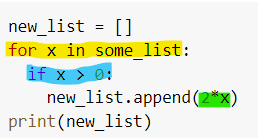

In [4]:
new_list = [2*x for x in some_list if x > 0]
print(new_list)

[4, 8, 14, 2, 8, 10]


The comprehension gives the same result by placing the value, iteration, and condition inside of square brackets.

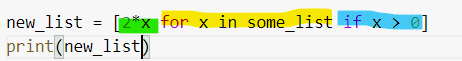

Let's wrap this in a function so that we can easily use it later.

In [5]:
def twice_if_positive(some_list):
  return [2*x for x in some_list if x > 0]

## Nested Data

You may find that you need to create iterables based on nested data structures. Comprehensions can help! The syntax also hints at what your end result will look like. This helps people reading your code in the future understand easier (You will often be this person!) Below we will define `some_nested_list` which will be used in the next few examples.

In [6]:
some_nested_list = [[2, 6, -10],
                    [-4, 2, 1, 5],
                    [-3, -4]]

### Nested list flattening
Suppose we need to get all the values out of this nested list in a row-wise format (each inner list is interpreted as a "row"). We could use a nested `for` loop.

In [7]:
new_list = []
for row in some_nested_list:
  for x in row:
    new_list.append(x)
print(new_list)

[2, 6, -10, -4, 2, 1, 5, -3, -4]


Now as a comprehension...

In [8]:
new_list = [x for row in some_nested_list for x in row]
print(new_list)

[2, 6, -10, -4, 2, 1, 5, -3, -4]


Notice how we just put the two iteration definitions one after the other.

### Creating nested data

Suppose that we want to apply the `twice_if_positive` logic to each row of `some_nested_list` and return the result in the same nested structure. Here's how it looks in a `for` loop.

In [9]:
new_list = []
for row in some_nested_list:
  new_inner_list = []
  for x in row:
    if x > 0:
      new_inner_list.append(2*x)
  new_list.append(new_inner_list)
print(new_list)

[[4, 12], [4, 2, 10], []]


There's a lot going on in that snippet. If you're looking at this for the first time you have to understand the structure of `some_nested_list`, understand the purpose of `new_list` and `new_inner_list`, parse the iteration/condition logic, and visually note the indentation. The indentation is key, because if it's off you get a totally different result (see below).

In [10]:
new_list = []
for row in some_nested_list:
  new_inner_list = []
  for x in row:
    if x > 0:
      new_inner_list.append(2*x)
    new_list.append(new_inner_list) # indented one more level than the example above
print(new_list)

[[4, 12], [4, 12], [4, 12], [4, 2, 10], [4, 2, 10], [4, 2, 10], [4, 2, 10], [], []]


Now let's take a look at the comprehension version...

In [11]:
new_list = [[2*x for x in row if x > 0] for row in some_nested_list]
print(new_list)

[[4, 12], [4, 2, 10], []]


The comprehension is a lot less code. For each `row` in `some_nested_list` you get a list comprehension structured like that in the first example. 

This syntax is simpler to read as the square brackets clearly indicate the structure of the result and there are no internal temporary variables to understand. Indentation is also not a concern since the logic is nested based on the brackets.

### Making a dictionary from the nested lists

Suppose we want to make a dictionary mapping each "row index" to the result of the `twice_if_positive` logic applied to that row. Here's how we would do so with `for` loops. 

Note: This example makes use of the `enumerate` function which gives both the index and the value when you iterate over it.

In [12]:
new_dict = {}
for i, row in enumerate(some_nested_list):
  new_inner_list = []
  for x in row:
    if x > 0:
      new_inner_list.append(2*x)
  new_dict[i] = new_inner_list
print(new_dict)

{0: [4, 12], 1: [4, 2, 10], 2: []}


Now let's try the comprehension...

In [13]:
new_dict = {i:[2*x for x in row if x > 0] for i, row in enumerate(some_nested_list)}
print(new_dict)

{0: [4, 12], 1: [4, 2, 10], 2: []}


## Encapsulating logic within functions

In general, it is good practice to use functions and function calls to encapsulate your logic. It makes your code easier to debug and easier to read.

The comprehensions in the nested examples were easier to understand than the `for` loop versions, but there still was a lot of logic to unpack inside the inner comprehension. We can substitute in a call to `twice_is_positive`.

In [14]:
new_list = [twice_if_positive(row) for row in some_nested_list]
print(new_list)
new_dict = {i: twice_if_positive(row) for i, row in enumerate(some_nested_list)}
print(new_dict)

[[4, 12], [4, 2, 10], []]
{0: [4, 12], 1: [4, 2, 10], 2: []}


There is a slight tradeoff here. We now cannot infer the final structure at a glance. We have to understand that `twice_if_positive` returns a list. This example was fairly simple, but when dealing with data structures with even more layers the advantages of encapsulation will outweigh the tradeoff in structure. 

### More complicated example

Say we have a dictionary of nested lists. The lists have the structure of `some_nested_list` and the keys are arbitrary strings.

In [15]:
messy_dict = {
    'key_0': [[40, 10, -1], [0, -3], [-5, 14]],
    'key_1': [[4, 5, 6],[10, -3]],
    'key_2': [[44, -1, 5], [-5], [-1, 0]]
}

Now suppose we want to apply our same logic which we used for `new_dict` to each of the values and return the result using capitalized versions of the original keys.

In [16]:
{k.upper(): {i: [2*x for x in row if x > 0] for i, row in enumerate(v)} for k, v in messy_dict.items()}

{'KEY_0': {0: [80, 20], 1: [], 2: [28]},
 'KEY_1': {0: [8, 10, 12], 1: [20]},
 'KEY_2': {0: [88, 10], 1: [], 2: []}}

**What a mess!** Comprehensions like this one make it seem like using them at all is a waste of time and generates unreadable spaghetti. Let's clean it up with some encapsulation.

In [17]:
# Third Layer
def twice_if_positive(some_list): # just so you don't have to scroll
  return [2*x for x in some_list if x > 0]

# Second Layer
def dict_tip(some_nested_list):
  return {i: twice_if_positive(row) for i, row in enumerate(some_nested_list)}

# Top Layer
def process_messy(messy_dict):
  return {k.upper(): dict_tip(v) for k, v in messy_dict.items()}
  
process_messy(messy_dict)

{'KEY_0': {0: [80, 20], 1: [], 2: [28]},
 'KEY_1': {0: [8, 10, 12], 1: [20]},
 'KEY_2': {0: [88, 10], 1: [], 2: []}}

Now we have the 3 layers separated and encapsulated. We can understand what each layer does and easily see how they work together. Another advantage of this is the inevitable code maintenance that you will have to do down the road.

Say that you wrote the code above 6 months ago and then moved on to bigger and better things. But a new manager took over and now there's a requirement that this result cannot contain empty lists in the middle layer. With the spaghetti version, you have to parse out where this middle layer is getting built to make the change. However, in the encapsulated implementation you can just change the `dict_tip` function which is much simpler.

In [19]:
def dict_tip(some_nested_list):
  my_dict = {i: twice_if_positive(row) for i, row in enumerate(some_nested_list)}
  return {k:v for k, v in my_dict.items() if len(v) > 0}

process_messy(messy_dict)

{'KEY_0': {0: [80, 20], 2: [28]},
 'KEY_1': {0: [8, 10, 12], 1: [20]},
 'KEY_2': {0: [88, 10]}}

# That's all folks!
Hopefully this takes some of the mystery out of using and parsing list comprehensions.